## Results analysis



In [1]:
from json import load
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    root_mean_squared_error,
    mean_absolute_error,
)
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict

COLUMNS = ["int_score", "topic", "format", "age_group"]
NUMERIC_COLUMNS = {"int_score": [0, 1, 2, 3, 4, 5]}
COLUMNS_TO_LABELS = {
    "int_score": [0, 1, 2, 3, 4, 5],
    "topic": [
        "Conținut pentru adulți",
        "Artă și design",
        "Dezvoltare software",
        "Crime și investigații",
        "Educație și joburi",
        "Electronică și hardware",
        "Divertisment",
        "Viață socială",
        "Modă și frumusețe",
        "Finanțe și afaceri",
        "Mâncare și băuturi",
        "Jocuri",
        "Sănătate",
        "Istorie și geografie",
        "Hobby-uri și casă",
        "Industrial",
        "Literatură",
        "Politică",
        "Religie",
        "Știință, matematică și tehnologie",
        "Software",
        "Sport și fitness",
        "Transport",
        "Turism și călătorii",
    ],
    "format": [
        "Articol academic",
        "Cuprins",
        "Scriere creativă",
        "Pagină de asistență pentru clienți",
        "Forum de discuții",
        "Întrebări frecvente (FAQs)",
        "Conținut incomplet",
        "Articol de cunoștințe",
        "Notificări legale",
        "Articol de tip listă",
        "Articol de știri",
        "Scriere non-ficțiune",
        "Pagină despre organizație",
        "Anunț organizațional",
        "Pagină personală",
        "Blog personal",
        "Pagină de produs",
        "Forum întrebări și răspunsuri",
        "Spam și reclame",
        "Date structurate",
        "Scriere tehnică",
        "Transcriere sau interviu",
        "Tutorial sau ghid",
        "Recenzii ale utilizatorilor",
    ],
    "age_group": [
        "Preșcolar",
        "Școală primară",
        "Școală gimnazială",
        "Liceu",
        "Licență",
        "Post-universitar",
    ],
}
LABEL_PREFIX = "original_"

### Reading the data

#### English

In [2]:
# Select the desired path to the predictions file

# path = "../predictions/small_dataset_Llama-3.3-70B-Instruct_final_eng.json"  # ref

# path = '../predictions/small_dataset_Meta-Llama-3-70B-Instruct_final_eng.json'
# path = '../predictions/small_dataset_Meta-Llama-3.1-70B-Instruct_final_eng.json'

# path = '../predictions/small_dataset_Meta-Llama-3.1-8B-Instruct_final_eng.json'
# path = '../predictions/small_dataset_Meta-Llama-3-8B-Instruct_final_eng.json'

# path = '../predictions/small_dataset_gemma-2-27b-it_final_eng.json'
# path = '../predictions/small_dataset_gemma-2-9b-it_final_eng.json'

# path = '../predictions/small_dataset_gemma-3-27b-it_final_eng.json'
# path = '../predictions/small_dataset_gemma-3-12b-it_final_eng.json'

# path = '../predictions/small_dataset_aya-23-35B_final_eng.json'
# path = "../predictions/small_dataset_Qwen2.5-72B-Instruct_final_eng.json"

# path = '../predictions/small_dataset_Mistral-Small-3.1-24B-Instruct-2503_final_eng.json'

#### Romanian

In [3]:
# Select the desired path to the predictions file

# path = '../predictions/small_dataset_Llama-3.3-70B-Instruct_final_ro.json' # ref

# path = '../predictions/small_dataset_Meta-Llama-3-70B-Instruct_final_ro.json'
# path = '../predictions/small_dataset_Meta-Llama-3.1-70B-Instruct_final_ro.json'

# path = '../predictions/small_dataset_Meta-Llama-3.1-8B-Instruct_final_ro.json'
# path = '../predictions/small_dataset_Meta-Llama-3-8B-Instruct_final_ro.json'

# path = '../predictions/small_dataset_gemma-2-27b-it_final_ro.json'
# path = '../predictions/small_dataset_gemma-2-9b-it_final_ro.json'

# path = '../predictions/small_dataset_gemma-3-27b-it_final_ro.json'
# path = '../predictions/small_dataset_gemma-3-12b-it_final_ro.json'

# path = '../predictions/small_dataset_aya-23-35B_final_ro.json'
# path = "../predictions/small_dataset_Qwen2.5-72B-Instruct_final_ro.json"

# path = '../predictions/small_dataset_Mistral-Small-3.1-24B-Instruct-2503_final_ro.json'

In [4]:
# path = "../predictions/small_dataset_gemma-3-12b-it_final.json"
path = "../fineweb/small_dataset_results.json"

In [5]:
with open(path, "r") as f:
    data = load(f)

for col in NUMERIC_COLUMNS:
    for i in range(len(data)):
        try:
            aux = int(data[i][col])
            if aux < min(NUMERIC_COLUMNS[col]) or aux > max(NUMERIC_COLUMNS[col]):
                raise ValueError(f"Value {aux} out of range for column {col}")
        except:
            print(
                f"Error converting {col} to int for index {i}: {data[i][col]}, using default value 0"
            )
            data[i][col] = 0  # average value

Number of mismatching predictions: 0, list: []
RMSE for int_score: 1.00
MAE for int_score: 0.75
My custom error: 0.11
60


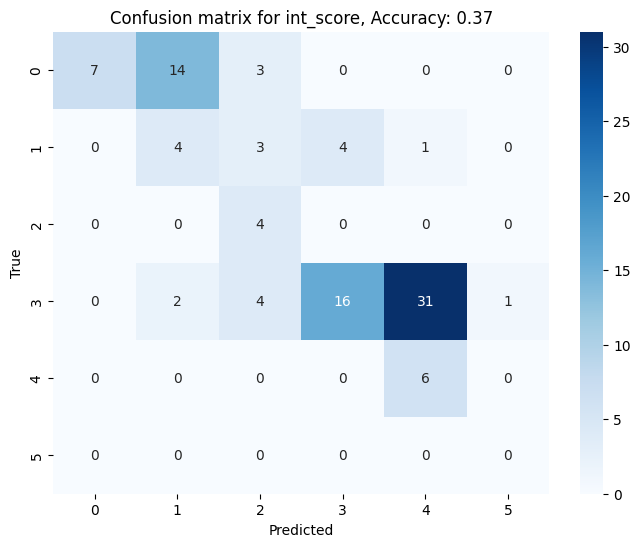

Number of mismatching predictions: 0, list: []


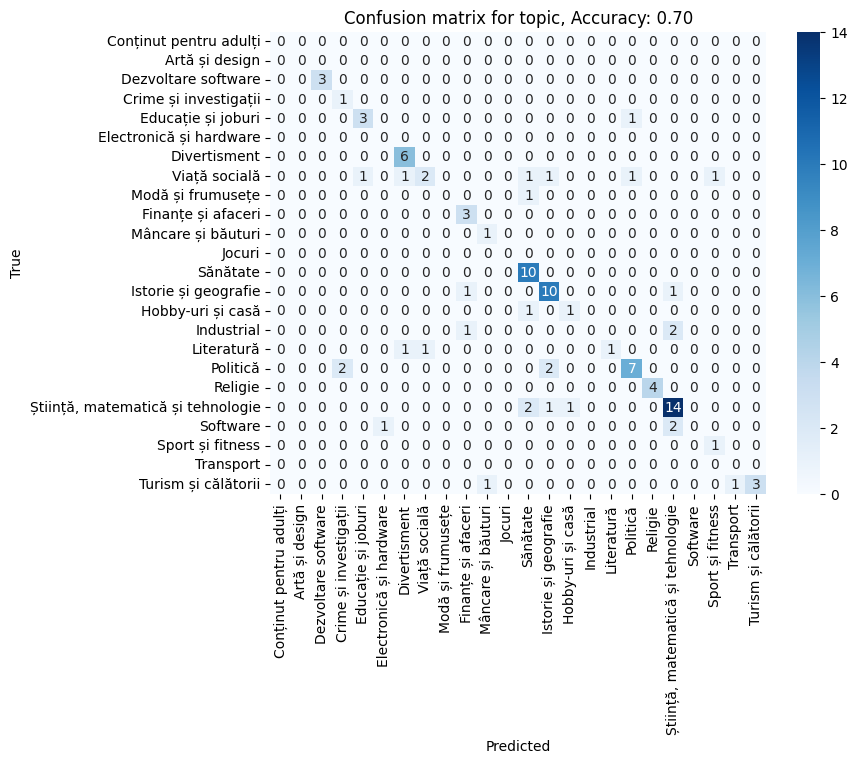

Number of mismatching predictions: 0, list: []


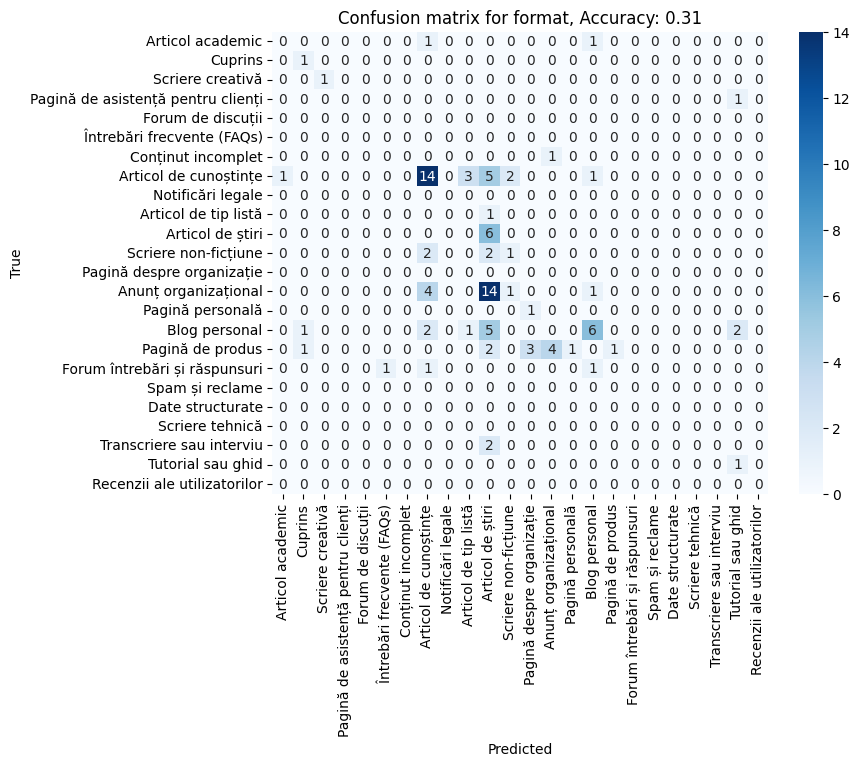

Number of mismatching predictions: 0, list: []
RMSE for age_group: 0.89
MAE for age_group: 0.62


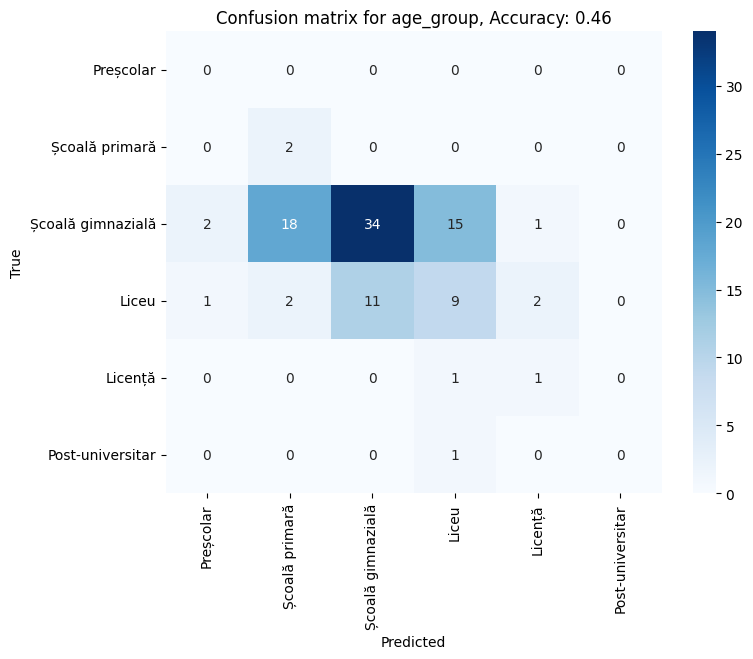

In [6]:
for col in COLUMNS:
    y_pred = [example[col] for example in data]
    y_test = [example[LABEL_PREFIX + col] for example in data]

    mismatching = list(filter(lambda x: x not in COLUMNS_TO_LABELS[col], y_pred))
    print(f"Number of mismatching predictions: {len(mismatching)}, list: {mismatching}")

    if col == "int_score":
        print(f"RMSE for {col}: {root_mean_squared_error(y_test, y_pred):.2f}")
        print(f"MAE for {col}: {mean_absolute_error(y_test, y_pred):.2f}")
        print(
            f"My custom error: {sum((y_test[i] < 3) != (y_pred[i] < 3) for i in range(len(y_test))) / len(y_test):.2f}"
        )
        print(len([y for y in y_test if y >= 3]))

    elif col == "age_group":
        mapping = defaultdict(
            lambda: 0,
            {
                "Preșcolar": 0,
                "Școală primară": 1,
                "Școală gimnazială": 2,
                "Liceu": 3,
                "Licență": 4,
                "Post-universitar": 5,
            },
        )
        y_pred_ = [mapping[x] for x in y_pred]
        y_test_ = [mapping[x] for x in y_test]
        print(f"RMSE for {col}: {root_mean_squared_error(y_test_, y_pred_):.2f}")
        print(f"MAE for {col}: {mean_absolute_error(y_test_, y_pred_):.2f}")

    labels = (
        sorted(list(set(y_test + y_pred)))
        if col not in COLUMNS_TO_LABELS
        else COLUMNS_TO_LABELS[col]
    )
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues"
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(
        f"Confusion matrix for {col}, Accuracy: {accuracy_score(y_test, y_pred):.2f}"
    )
    plt.show()